### topics:
* visualization
* bar charts 
* scatter plots 

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np 

In [3]:
hr_data = hr_df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [4]:
hr_data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [6]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [7]:
hr_data.rename(columns={'sales':'dept'}, inplace=True)

### ploating department wise distribution 

In [9]:
res = hr_data.dept.value_counts()

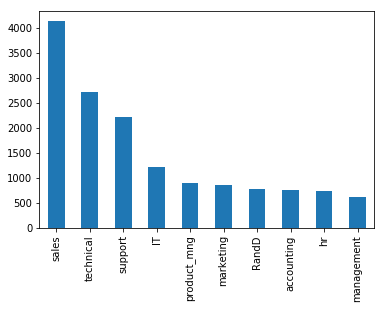

In [10]:
res.plot.bar()

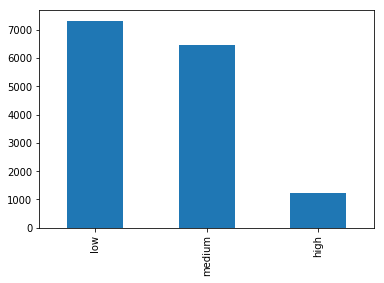

In [13]:
hr_data.salary.value_counts().plot.bar()

### Bar charts 
* to plot the frequency of a categorical column use bar chart 
* if data data is series bar chart is one layer

### give a hike to people who are working more than 4 projects  

In [15]:
hr_data.columns 

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [17]:
hr_data.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [20]:
def f(r):
    if r.number_project >4:
        if r.salary == 'medium':
            return 'high'
        elif r.salary == 'low':
            return 'medium'
    else:
        return r.salary
    
hr_data['new_salary']=hr_data.apply(f,axis = 1)

In [22]:
hr_data.sample(5)

satisfaction_level  last_evaluation  number_project  \
1580                0.49             0.73               4   
8850                0.97             0.54               3   
6325                0.84             0.55               4   
7368                0.73             0.91               4   
446                 0.44             0.46               2   

      average_montly_hours  time_spend_company  Work_accident  left  \
1580                   244                   3              0     1   
8850                   255                   2              1     0   
6325                   149                   2              0     0   
7368                   248                   2              1     0   
446                    143                   3              0     1   

      promotion_last_5years         dept  salary new_salary  
1580                      0      support     low        low  
8850                      0        RandD    high       high  
6325                      0  product_mng  medium     medium  
7368                      0    technical  medium     medium  
446                       0           IT     low        low

In [26]:
new_salary = hr_data.new_salary.value_counts()

In [28]:
old_salary = hr_data.salary.value_counts()

In [30]:
salary_comp = pd.DataFrame({'Old Salary':old_salary,'New Salary':new_salary})

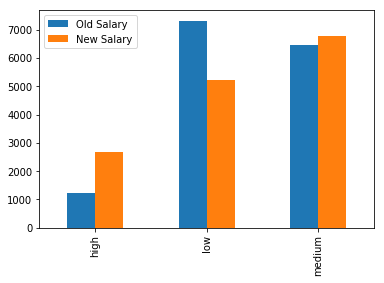

In [32]:
salary_comp.plot.bar()

In [33]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']

adult_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)

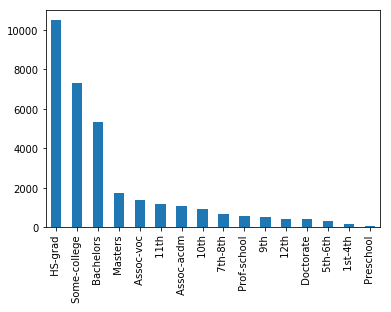

In [35]:
adult_data.education.value_counts().plot.bar()

### scatter plot 

* understanding trend/realationship between the continues data

Text(0, 0.5, 'avg monthly hrs')

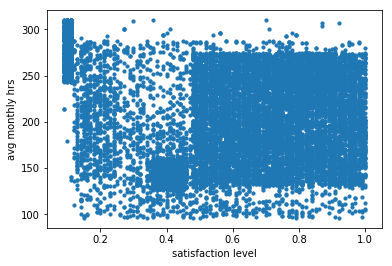

In [38]:
plt.scatter(x = hr_data.satisfaction_level,y=hr_data.average_montly_hours,s=10)
plt.xlabel('satisfaction level')
plt.ylabel('avg monthly hrs')

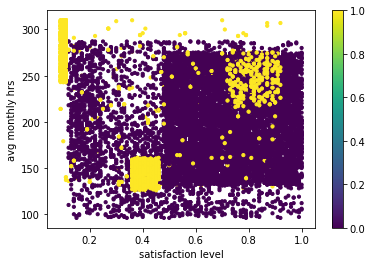

In [43]:
plt.scatter(x=hr_data.satisfaction_level, y=hr_data.average_montly_hours,s=10,c=hr_data.left)
plt.xlabel('satisfaction level')
plt.ylabel('avg monthly hrs')
plt.colorbar()

In [42]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
        because th

In [44]:
adult_data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  Salary  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

*P lot the relationship between education-num & hours-per-week
* Plot the relationship between education-num & hours-per-week & gender

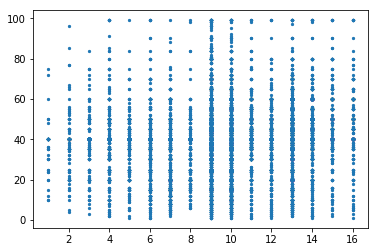

In [49]:

plt.scatter(x=adult_data['education-num'],y = adult_data['hours-per-week'],s=5)

In [50]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [51]:
adult_data['sex'] = adult_data.sex.str.strip()

In [52]:
adult_data['sex_num'] = adult_data.sex.map(lambda x: 1 if x == 'Male' else 0)

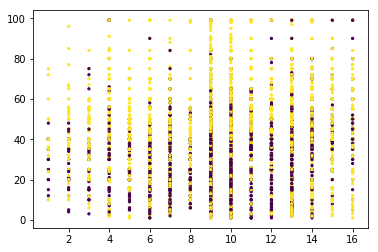

In [53]:
plt.scatter(x=adult_data['education-num'],y=adult_data['hours-per-week'],s=5, c=adult_data.sex_num)

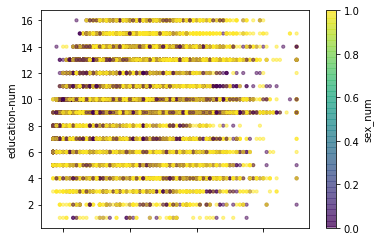

In [54]:
adult_data.plot.scatter(x='age',y='education-num',c='sex_num',s=10, cmap='viridis',alpha=.5)

### Pie charts
* small information chart 

([<matplotlib.patches.Wedge at 0x109ba870>,
 [Text(0.04226778373338524, 1.0991876247748915, 'low'),
  Text(-0.32247422223497674, -1.051670279124568, 'medium'),
  Text(1.06328474507822, -0.28182539077227425, 'high')],
 [Text(0.02305515476366467, 0.5995568862408499, '48.78'),
  Text(-0.1758950303099873, -0.5736383340679462, '42.98'),
  Text(0.5799734973153926, -0.1537229404212405, '8.25')])

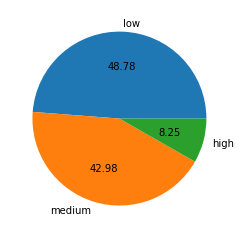

In [55]:
plt.pie(x=old_salary,labels=old_salary.index,autopct= '%.2f')

In [56]:
edu_dist = adult_data.education.value_counts()

([<matplotlib.patches.Wedge at 0x109babf0>,
 [Text(0.5820899380125792, 0.9333655790013428, ' HS-grad'),
  Text(-1.0080460983118946, 0.44027612208495526, ' Some-college'),
  Text(-0.7597721283465596, -0.7954535266046276, ' Bachelors'),
  Text(-0.08741327393996691, -1.096521280933068, ' Masters'),
  Text(0.24008494758967386, -1.0734799569348576, ' Assoc-voc'),
  Text(0.4949730840386798, -0.9823449730503222, ' 11th'),
  Text(0.694280840521506, -0.8532139910273104, ' Assoc-acdm'),
  Text(0.8450166685674572, -0.704234925179912, ' 10th'),
  Text(0.942102978552347, -0.5678397465859502, ' 7th-8th'),
  Text(1.0023572365721214, -0.45307832688344374, ' Prof-school'),
  Text(1.0443802910268456, -0.3453546115439627, ' 9th'),
  Text(1.0715349148116406, -0.2486220552155627, ' 12th'),
  Text(1.0882384969803631, -0.16042747174321548, ' Doctorate'),
  Text(1.0969578840449365, -0.0817520680573624, ' 5th-6th'),
  Text(1.099626774868771, -0.02865232960346699, ' 1st-4th'),
  Text(1.0999866828441163, -0.0054

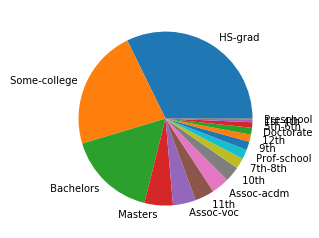

In [57]:
plt.pie(x=edu_dist, labels=edu_dist.index)